In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
logs = pd.read_csv('Logs.csv')

### Normality test

In [3]:
time_values = logs['time (m)'].values

res = stats.shapiro(time_values)

print("statistic", res.statistic)
print("p-value", res.pvalue)

statistic 0.8463562573820891
p-value 7.347788147944341e-05


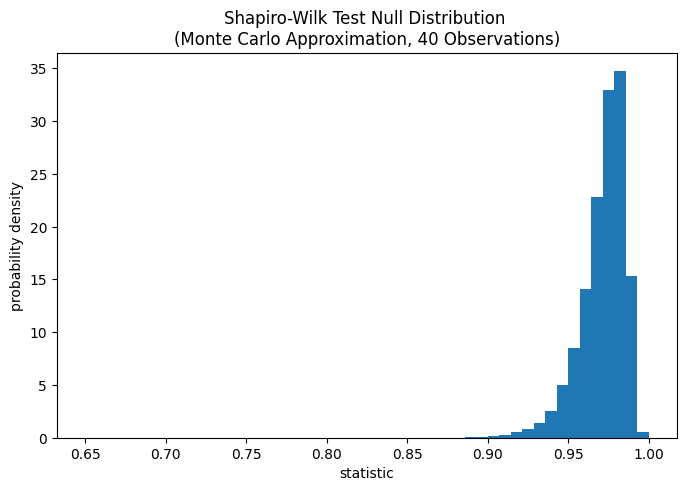

In [4]:
def statistic(x):
    return stats.shapiro(x).statistic

ref = stats.monte_carlo_test(time_values, stats.norm.rvs, statistic,
                             alternative='less')

fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0.65, 1, 50)
def plot(ax):  # we'll reuse this
    ax.hist(ref.null_distribution, density=True, bins=bins)
    ax.set_title("Shapiro-Wilk Test Null Distribution \n"
                 "(Monte Carlo Approximation, 40 Observations)")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

Because the p-value is very small there is a low probability of sampling data from a normally distributed population that produces these values of statistics. We then reject the null hypothesis and assume that the data is **not** normally distributed.

### Wilcoxon rank sum for n recordings/time data (logs)

In [5]:
high_proficiency = logs[logs['Group'] == 'High']
low_proficiency = logs[logs['Group'] == 'Low']

high_time = high_proficiency['time (ms)'].values
low_time = low_proficiency['time (ms)'].values

In [6]:
ranksum_result = stats.ranksums(high_time, low_time)

print("statistic: ", ranksum_result.statistic)
print("p-value: ", ranksum_result.pvalue)

statistic:  0.5680518698404823
p-value:  0.5699997477501184


In [7]:
high_recordings = high_proficiency['Number of Recordings'].values
low_recordings = low_proficiency['Number of Recordings'].values

In [8]:
ranksum_result_recordings = stats.ranksums(high_recordings, low_recordings)

print("statistic: ", ranksum_result_recordings.statistic)
print("p-value: ", ranksum_result_recordings.pvalue)

statistic:  -1.1631538287209875
p-value:  0.24476709560795828


### Boxplots time and number of recordings

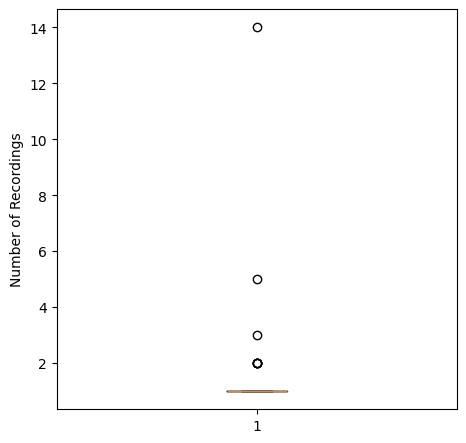

In [9]:
time_values = logs['time (m)'].values
number_recordings_values = logs['Number of Recordings'].values

data = [number_recordings_values]

fig = plt.figure(figsize =(4, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# ax.set_ylabel('time (m)')
ax.set_ylabel('Number of Recordings')

# ax.set_xticklabels(['time (m)'])

# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

### Distribution of time and number of recordings

Text(0.5, 0, 'Number of Recordings')

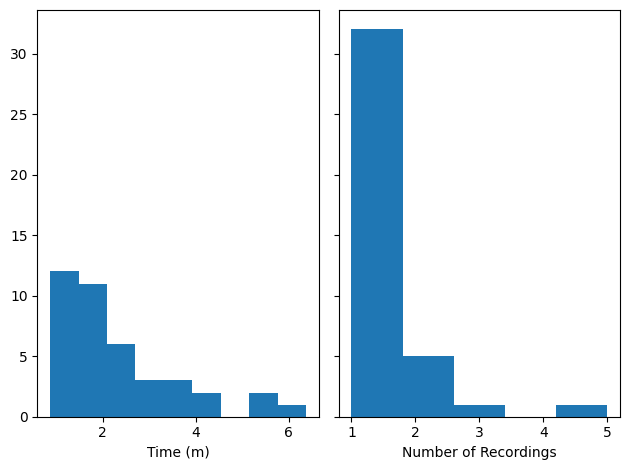

In [10]:
time_values = logs['time (m)'].values
number_recordings_values = [value for value in logs['Number of Recordings'].values if value < 9]
# number_recordings_values = logs['Number of Recordings'].values

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(time_values, bins=9)
axs[1].hist(number_recordings_values, bins=5)

axs[0].set_xlabel('Time (m)')
axs[1].set_xlabel('Number of Recordings')


### Boxplots comfort with english and comfort with tech

Text(0.5, 0, 'Technology comfort')

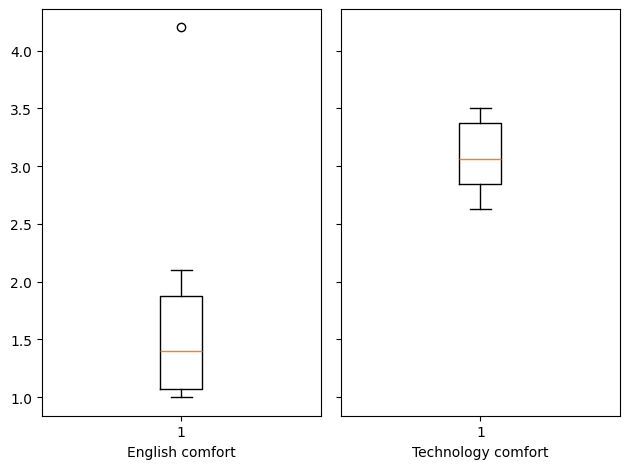

In [11]:
survey = pd.read_csv('survey.csv')

comfort_english = survey['comfort_english'].values
comfort_tech = survey['comfort_tech'].values

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].boxplot([comfort_english])
axs[1].boxplot([comfort_tech])

axs[0].set_xlabel('English comfort')
axs[1].set_xlabel('Technology comfort')


### Distribution of english and tech

Text(0.5, 0, 'Technology comfort')

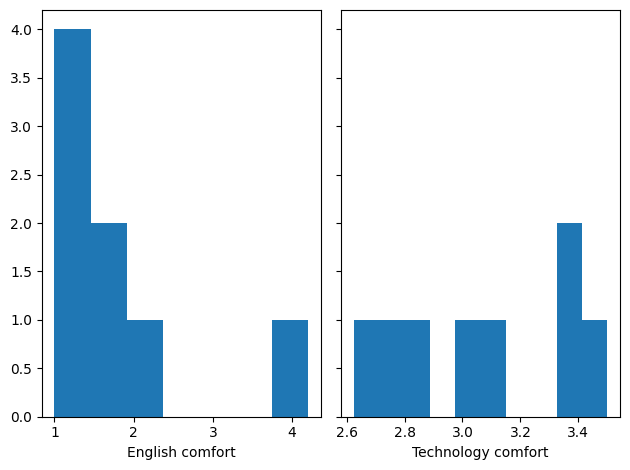

In [12]:
comfort_english = survey['comfort_english'].values
comfort_tech = survey['comfort_tech'].values

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(comfort_english, bins=7)
axs[1].hist(comfort_tech, bins=10)

axs[0].set_xlabel('English comfort')
axs[1].set_xlabel('Technology comfort')

### Scatter plots (english x recordings, english x time, tech x recordings, tech x time)

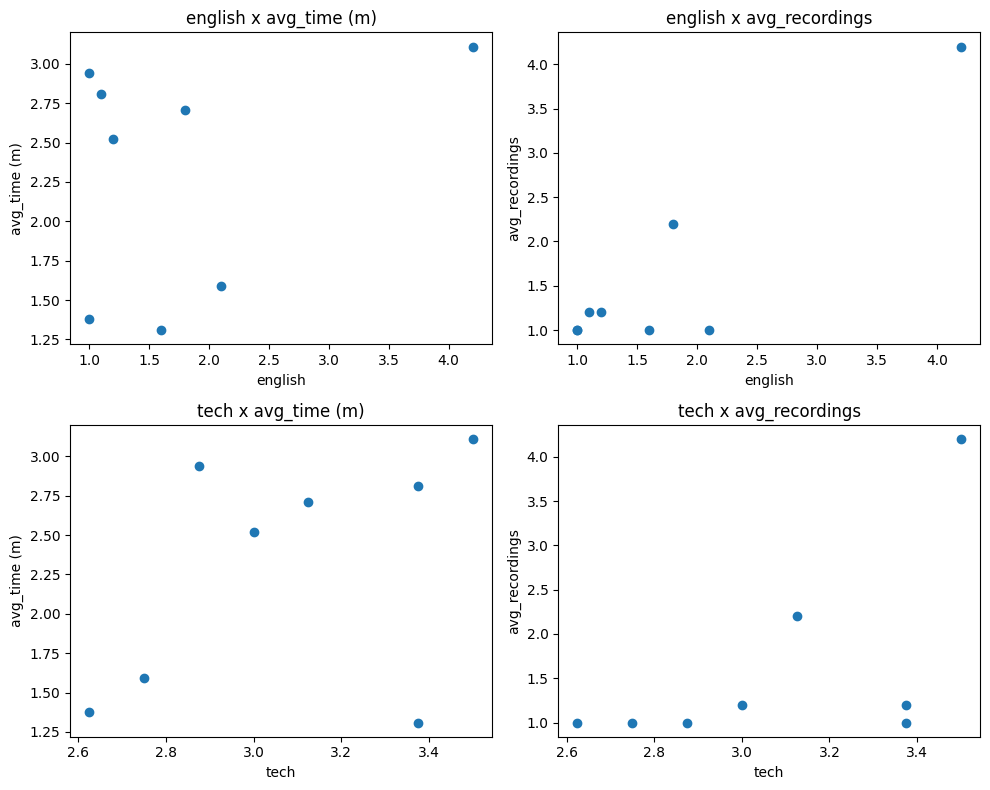

In [13]:
correlations = pd.read_csv('correlations.csv')

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(correlations["english"], correlations["avg_time (m)"])
axs[0, 0].set_title('english x avg_time (m)')
axs[0, 0].set_xlabel('english')
axs[0, 0].set_ylabel('avg_time (m)')

axs[0, 1].scatter(correlations["english"], correlations["avg_recordings"])
axs[0, 1].set_title('english x avg_recordings')
axs[0, 1].set_xlabel('english')
axs[0, 1].set_ylabel('avg_recordings')

axs[1, 0].scatter(correlations["tech"], correlations["avg_time (m)"])
axs[1, 0].set_title('tech x avg_time (m)')
axs[1, 0].set_xlabel('tech')
axs[1, 0].set_ylabel('avg_time (m)')

axs[1, 1].scatter(correlations["tech"], correlations["avg_recordings"])
axs[1, 1].set_title('tech x avg_recordings')
axs[1, 1].set_xlabel('tech')
axs[1, 1].set_ylabel('avg_recordings')

plt.tight_layout()

plt.show()

### R coeficients

In [15]:
pairs = [("english", "avg_time (m)"), ("english", "avg_recordings"), ("tech", "avg_time (m)"), ("tech", "avg_recordings")]

for i, pair in enumerate(pairs):
    r, p = stats.pearsonr(correlations[pair[0]], correlations[pair[1]])

    print(pair, r, p)


('english', 'avg_time (m)') 0.29867909485849514 0.4723914870263129
('english', 'avg_recordings') 0.9088187809330179 0.0017679631798085457
('tech', 'avg_time (m)') 0.4327946123365459 0.2841498848722663
('tech', 'avg_recordings') 0.5747294713091972 0.13616850834171562
